In [2]:
source('utils.r')
source('selinf_functions.r')
source('metrics.r')
source('data_generator.r')
source('cov_matrix.r')

## Simulating random time
In this example we simulate data from a certain number of subjects and assume that time (introduced as a dummy variable) has a random effect. The rest of the computation is the same as before.

In [3]:
set.seed(1)

n_subjects= 25
n_observations = 4
n = n_subjects * n_observations
p = 100
q <- n_observations-1
SNR = 4
prop_relevant = 0.1

data <- data_generator_random_time(n_subjects, n_observations, p, SNR, prop_relevant, rho=0.5)
X <- data$X
Z <- data$Z
subjects <- data$subjects
y <- data$y
beta <- data$beta
sd <- data$sd

In [4]:
fixed_form = as.formula(
    paste("y ~ 1 +",paste("t", 1:q, sep="", collapse='+'), ' + ',paste("X", 1:p, sep="", collapse='+'),sep="")
  )

rand_form = list(subjects = as.formula(paste(" ~ 1 +",paste("t", 1:q, sep="", collapse='+'))))

selFun <- function(y) selFun_adapting_lambda(X, subjects, y, fixed_form, rand_form)

sel <- selFun(y)
sel_vec <- sel$vec
sel_names <- sel$names
lambda <- sel$lambda
print(metrics(sel_vec,c(TRUE,beta!=0)))

[1] 58.91949
$tpr
[1] 0.7142857

$fdr
[1] 0.3333333



In [14]:
sel_names

[1] "(Intercept)" "X1"          "X2"          "X3"          "X4"         
 [6] "X6"          "X7"          "X8"          "X9"          "X10"        
[11] "X25"         "X42"         "X52"         "X63"         "X83"

**Problem!!** The Lasso on this model does not select the time variables as fixed effects, but we want them to be included by default if we use our version of the variance estimate.

In [5]:
library('lmmlasso')

Loading required package: emulator

Loading required package: mvtnorm



Loading required package: miscTools

Loading required package: penalized

Loading required package: survival

Welcome to penalized. For extended examples, see vignette("penalized").



----------------------------------------------------------------------
This is a test release of the package 'lmmlasso'. If you have any questions or problems, do not hesitate to contact the author.
----------------------------------------------------------------------


Warning message in cov2cor(Psi):
"diag(.) had 0 or NA entries; non-finite result is doubtful"


Redundant covariance parameters. 


Warning message in cov2cor(Psi):
"diag(.) had 0 or NA entries; non-finite result is doubtful"


Redundant covariance parameters. 
|activeSet|>=min(p,ntot): Increase lambda or set stopSat=FALSE. 
[1] 13.58506


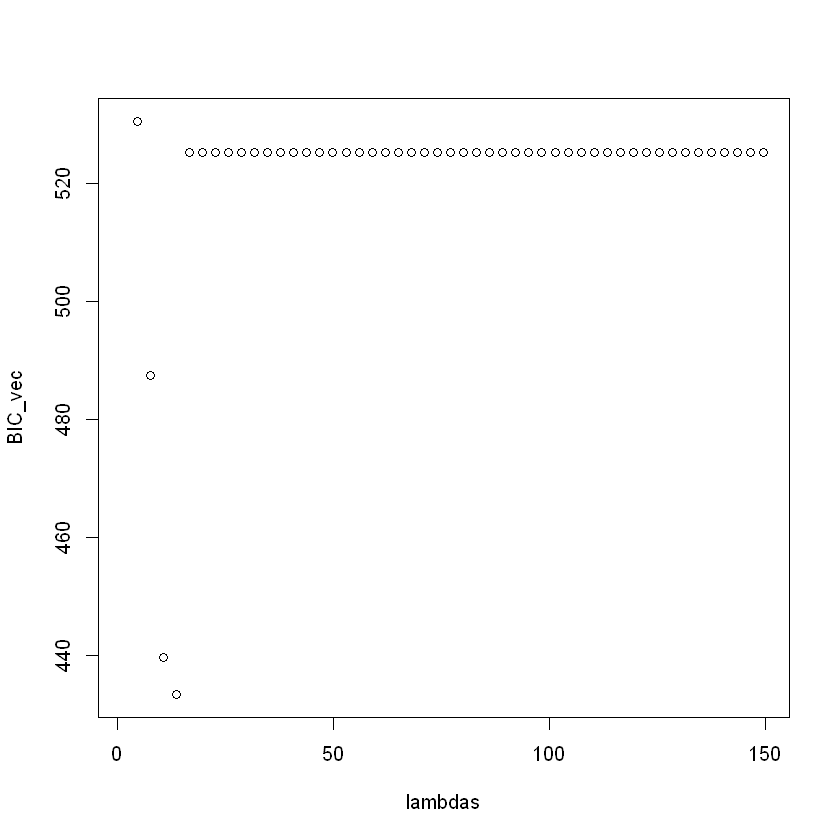

In [41]:
lambda.max.min.ratio = 0.01
n_lambdas = 50
lambda_max <- max(abs(t(X) %*% y))
plotting = TRUE
lambdas <- linspace(lambda_max,lambda_max*lambda.max.min.ratio, n=n_lambdas)
BIC_vec<-rep(Inf,length(lambdas))

for(j in 1:length(lambdas))
{

lasso_res <- lmmlasso(cbind(rep(1,n),X),y,cbind(rep(1,n),Z),subjects,lambda=lambdas[j],nonpen = c(1:4))
BIC_vec[j]<-lasso_res$bic
}

if(plotting) plot(lambdas,BIC_vec)

opt<-which.min(BIC_vec)

print(lambdas[opt])

lasso_res <- lmmlasso(cbind(rep(1,n),X),y,cbind(rep(1,n),Z),subjects,lambda=lambdas[opt],nonpen = c(1:4))

In [63]:
lmmlasso(cbind(rep(1,n),X),y,cbind(rep(1,n),Z),subjects,lambda=14,nonpen = c(1:4))$coefficients

(Intercept)          t1          t2          t3          X1          X2 
 0.33497512 -0.49392735 -1.09998268 -0.31322313 -0.80346222 -0.58172661 
         X3          X4          X5          X6          X7          X8 
 0.63553103 -1.01970741 -0.24784876 -0.36788489 -0.82513249 -0.67099986 
         X9         X10         X11         X12         X13         X14 
-0.57741280 -0.73260246  0.00000000  0.00000000  0.00000000  0.00000000 
        X15         X16         X17         X18         X19         X20 
 0.00000000  0.00000000  0.00000000  0.07579834  0.00000000  0.00000000 
        X21         X22         X23         X24         X25         X26 
 0.00000000 -0.11154206  0.00000000  0.00000000  0.00000000  0.00000000 
        X27         X28         X29         X30         X31         X32 
 0.00000000  0.04244026  0.00000000  0.00000000  0.00000000  0.00000000 
        X33         X34         X35         X36         X37         X38 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X39         X40         X41         X42         X43         X44 
 0.00000000  0.04108512  0.00000000 -0.09754342  0.00000000  0.00000000 
        X45         X46         X47         X48         X49         X50 
 0.00000000  0.00000000  0.00000000  0.00000000 -0.13637345  0.00000000 
        X51         X52         X53         X54         X55         X56 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X57         X58         X59         X60         X61         X62 
-0.04449202  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X63         X64         X65         X66         X67         X68 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X69         X70         X71         X72         X73         X74 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X75         X76         X77         X78         X79         X80 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X81         X82         X83         X84         X85         X86 
 0.12521768  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
        X87         X88         X89         X90         X91         X92 
-0.15572825  0.00000000  0.00000000 -0.07996277  0.00000000  0.00000000 
        X93         X94         X95         X96         X97         X98 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 -0.04268373 
        X99        X100 
 0.00000000  0.01164629

In [73]:
sel_form = as.formula(
  paste("y ~ t1 + t2 + t3 +  (1 + t1 + t2 + t3||subjects)")
)

final_model = lme(y ~ t1 + t2 + t3, random =~ 1 + t1 + t2 + t3| subjects, data=data.frame(X, subjects, y))

In [75]:
class(final_model)

[1] "lme"

In [64]:
lm(formula = y ~ t1 + t2 + t3, data=data.frame(X, y))


Call:
lm(formula = y ~ t1 + t2 + t3, data = data.frame(X, y))

Coefficients:
(Intercept)           t1           t2           t3  
    0.19988     -0.30938     -0.69506     -0.02733  


In [59]:
final_model

Linear mixed model fit by REML ['lmerModLmerTest']
Formula: sel_form
   Data: data.frame(X, subjects, y)
REML criterion at convergence: 492.9903
Random effects:
 Groups   Name        Std.Dev. Corr     
 subjects (Intercept) 2.0199            
          t1          1.5248   0.26     
          t2          0.2506   0.98 0.46
 Residual             2.3752            
Number of obs: 100, groups:  subjects, 25
Fixed Effects:
(Intercept)           t1           t2           t3  
    0.19988     -0.30938     -0.69506     -0.02733  
optimizer (nloptwrap) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 

In [48]:
metrics(lasso_res$coefficients!=0,c(1,beta!=0))

$tpr
[1] 1

$fdr
[1] 0.5